In [ ]:
import numpy as np
import sys
import time
import matplotlib.pyplot as plt

In [ ]:
#
# This is a sample Notebook to demonstrate how to read "MNIST Dataset"
#
import struct
from array import array
from os.path  import join

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath

    def read_images_labels(self, images_filepath, labels_filepath):
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())

        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        x_tran_786 = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img

        return images, labels, x_tran_786

    def load_data(self):
        x_train, y_train, x_tran_786 = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test, x_test_786 = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train, x_tran_786),(x_test, y_test, x_test_786)

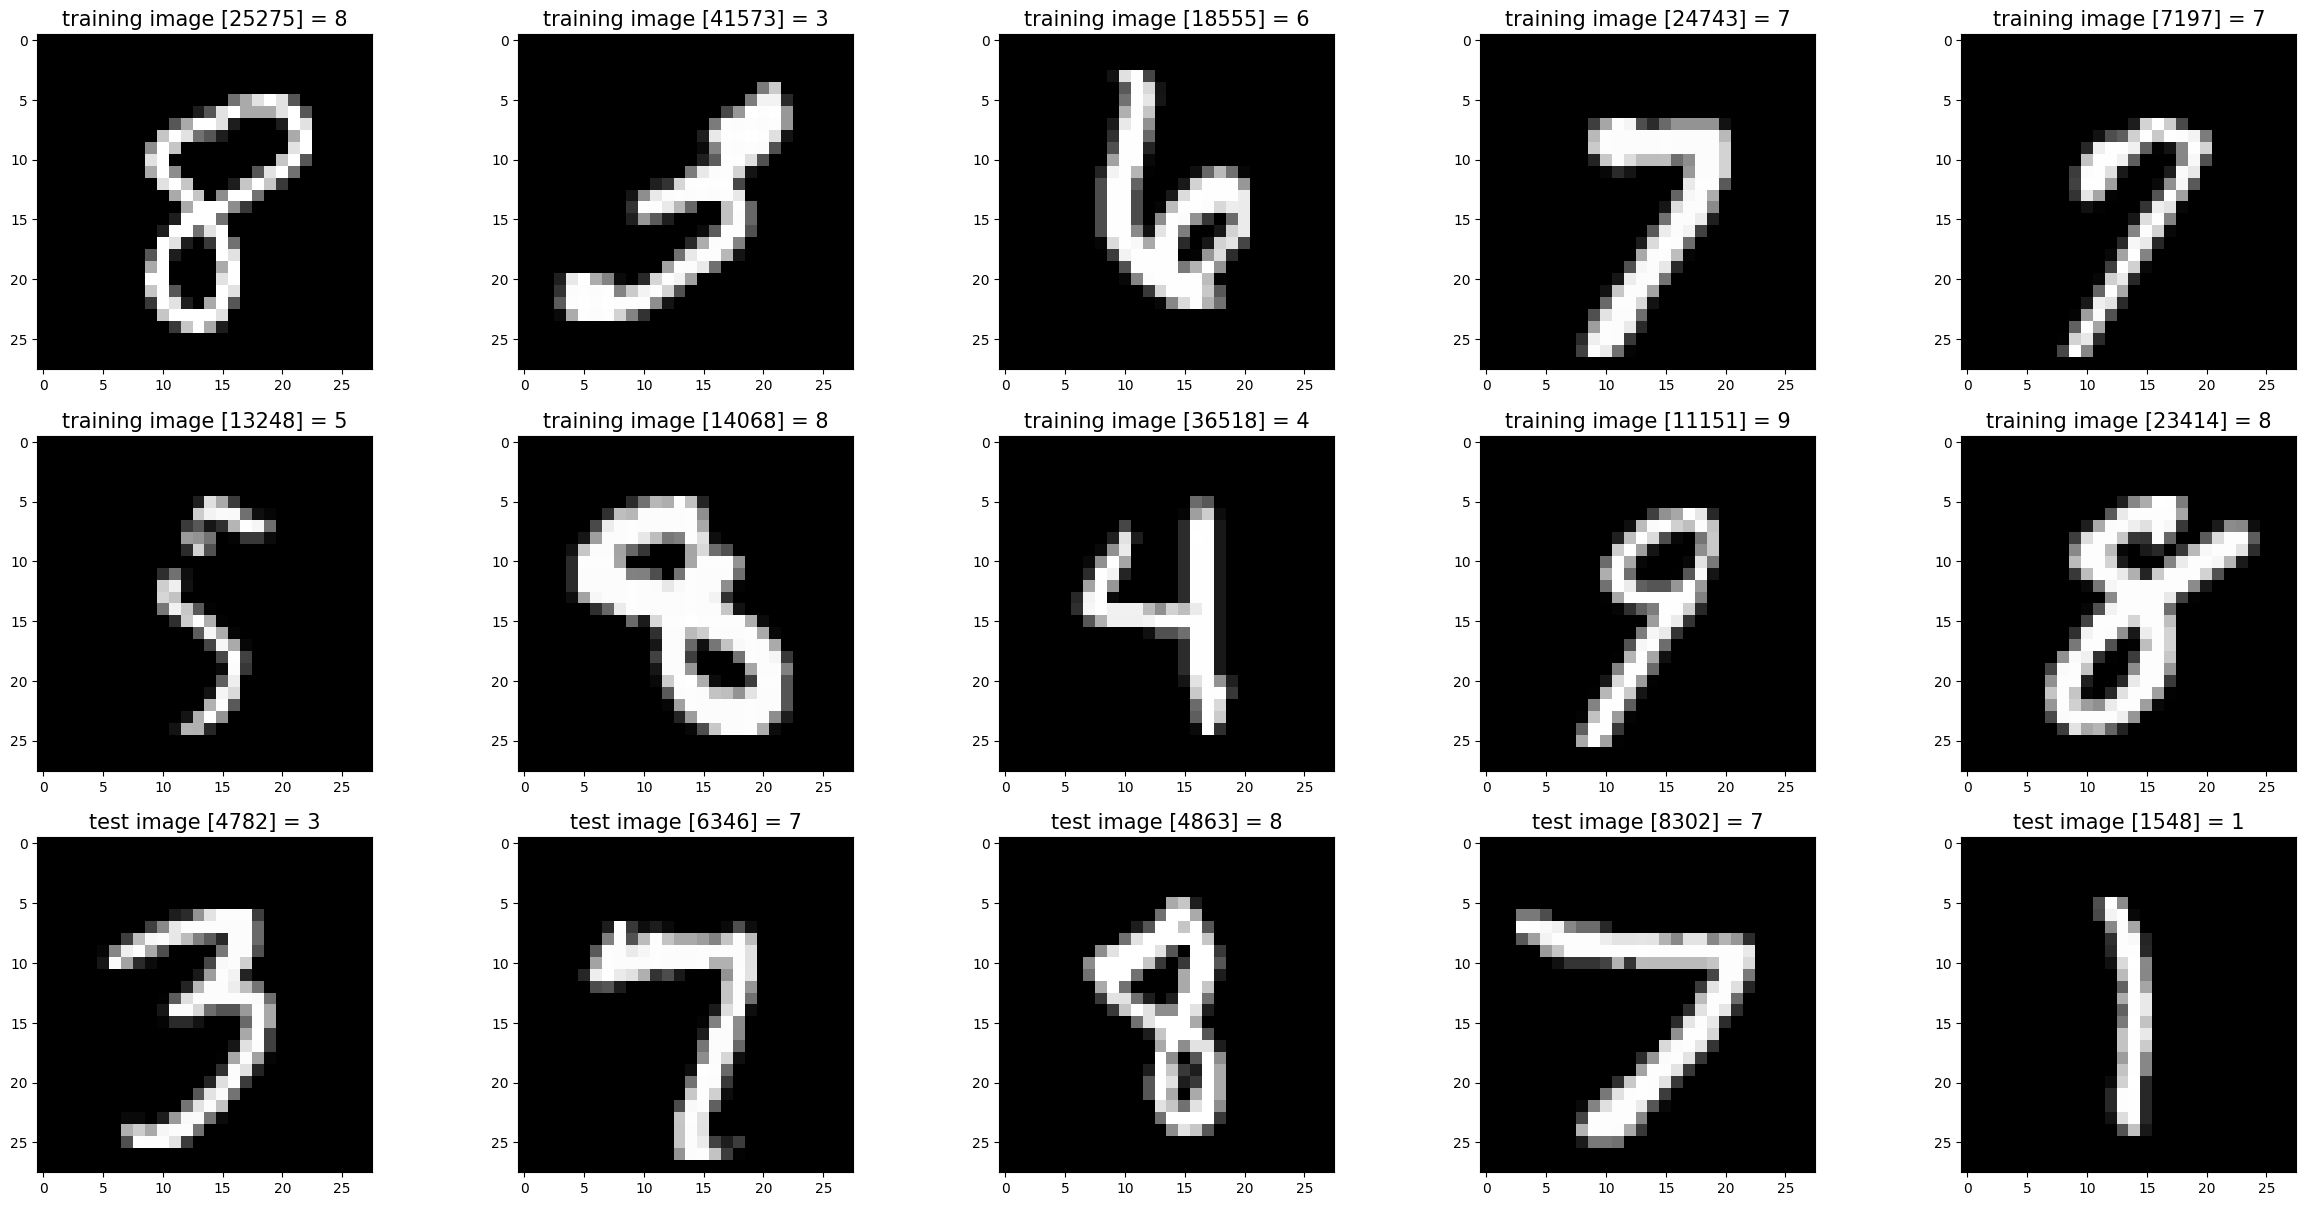

In [ ]:
#
# Verify Reading Dataset via MnistDataloader class
#
%matplotlib inline
import random
import matplotlib.pyplot as plt

#
# Set file paths based on added MNIST Datasets
#
input_path = '/content'
training_labels_filepath = join(input_path, 'train-labels.idx1-ubyte')
training_images_filepath = join(input_path, 'train-images.idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels.idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images.idx3-ubyte')

#
# Helper function to show leaded images
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1
    for x in zip(images, title_texts):
        image = x[0]
        title_text = x[1]
        plt.subplot(rows, cols, index)
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);
        index += 1

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train, x_tran_786), (x_test, y_test, x_test_786) = mnist_dataloader.load_data()

#
# Show Random training and test images and labels
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))

show_images(images_2_show, titles_2_show)

Task 1: Visualize the MNIST dataset on a 2-D plane using both supervised and unsupervised dimensionality approaches (FLD, PCA, t-SNE). Comment on what distribution you think would be appropriate to describe these datasets. This should give you some hint on if non-parametric learning might be a better option or not.

nX (5 pts): the standardized dataset

fX (10 pts): the projected data from FLD. Note that since mnist has c=10 classes, the number of dimensions it will reduce to should be m = c - 1 = 9 dimensions. In order to be able to visualize the data, you can further reduce it to 2 using t-SNE (tfX) or PCA (pfX).

pX (10 pts): the projected data from PCA. Always report the error rate introduced by pX.

tX (10 pts): the reduced data from t-SNE


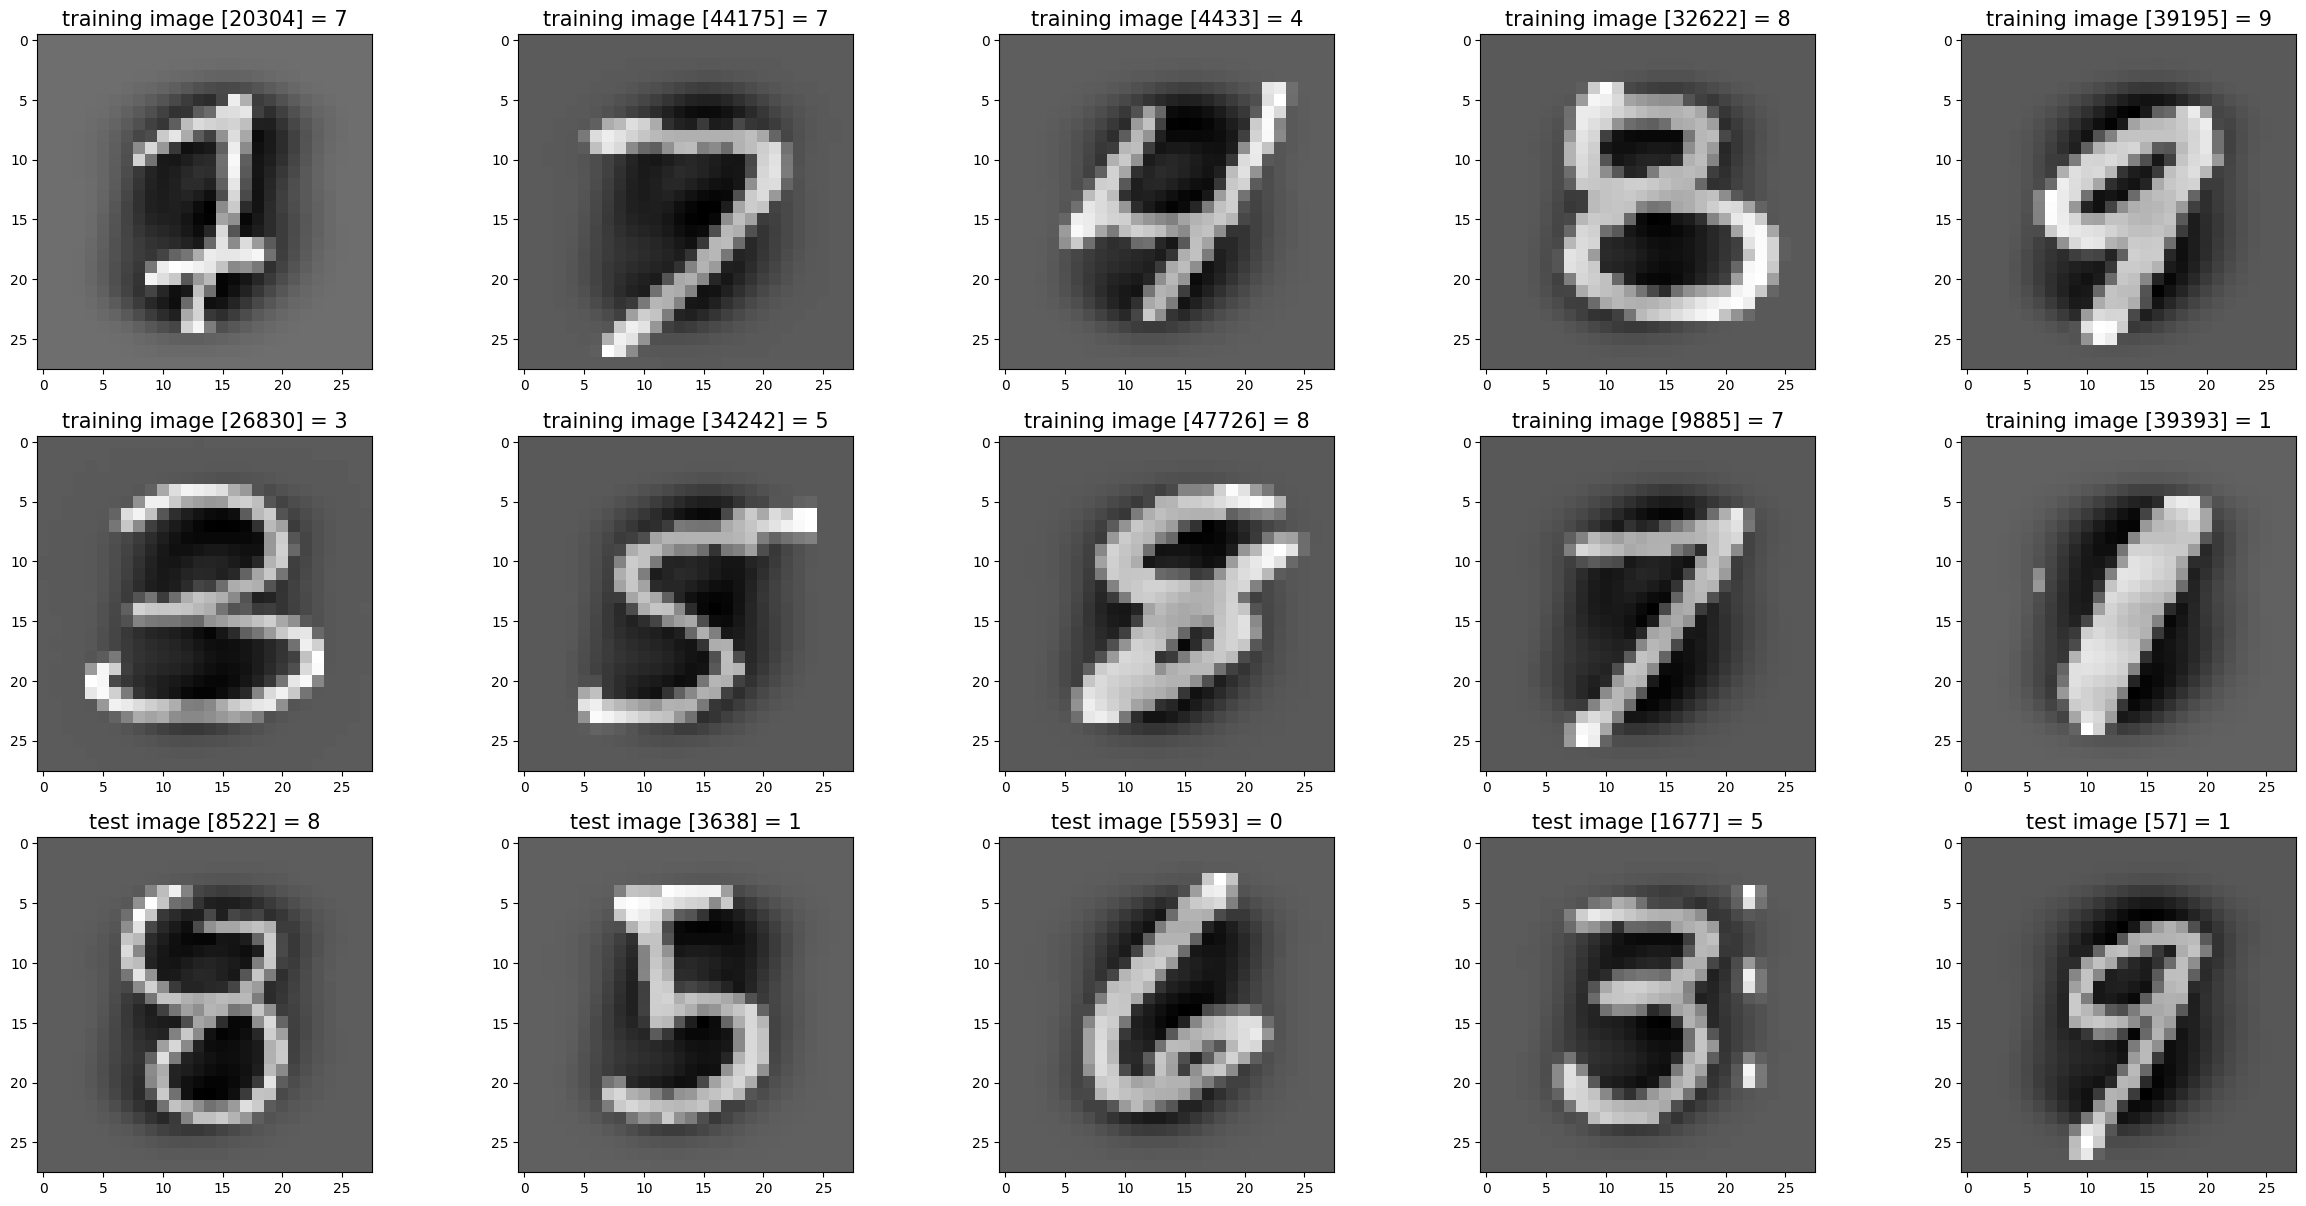

In [ ]:
def standardize(Tr, Te):
    """Normalize the training set and use the derived statistics to normalize the test set.
    """
    trMean = np.mean(Tr, axis = 0)
    trStd = np.std(Tr, axis = 0)
    Tr = (Tr - trMean) / 255.0
    Te = (Te - trMean) / 255.0

    return Tr, Te

X_tran, X_test = standardize(x_train, x_test)

images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(X_tran[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(X_tran[r])
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))

show_images(images_2_show, titles_2_show)

X_tran = X_tran.reshape(X_tran.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [ ]:
# def normalize(Tr, Te):
#     """Normalize the training set and use the derived statistics to normalize the test set.
#     """
#     trMean = np.mean(Tr, axis = 0)
#     trStd = np.std(Tr, axis = 0)
#     Tr = (Tr - trMean) / trStd
#     Te = (Te - trMean) / trStd

#     return Tr, Te
# X_tran, X_test = normalize(x_train, x_test)

# images_2_show = []
# titles_2_show = []
# for i in range(0, 10):
#     r = random.randint(1, 60000)
#     images_2_show.append(X_tran[r])
#     titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))

# for i in range(0, 5):
#     r = random.randint(1, 10000)
#     images_2_show.append(X_tran[r])
#     titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))

# show_images(images_2_show, titles_2_show)

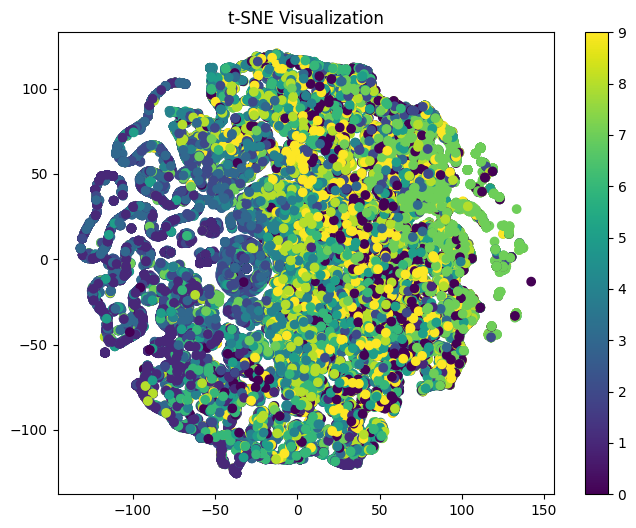

In [ ]:
## we want to discriminate the data based on  the distrubution of the data. Fishers discrimination is also supervised
# maximize the distance between the projected means
# def fld(X, y,  n_components):
#   samples, image_h, image_w = X.shape
#   unique_classes = np.unique(y)
#   class_means = []
#   class_scatter = np.zeros((image_h, image_w))

#   for classes in unique_classes:
#     class_data = X[y==classes]
#     class_means.append(np.mean(class_data, axis=0))
#     diff = class_data - class_means[-1]
#     class_scatter += np.sum([np.dot(d.T, d) for d in diff], axis=0)

#   within_class_scatter = np.zeros((image_h, image_w))
#   for i, classes in enumerate(unique_classes):
#     class_data = X[y == classes]
#     diff = class_data - class_means[i]
#     within_class_scatter += np.sum([np.dot(d.T, d) for d in diff], axis=0)

#   between_class_scatter = class_scatter - within_class_scatter

#   # now eigen vector part
#   eig_values, eig_vectors = np.linalg.eigh(np.dot(np.linalg.inv(within_class_scatter), between_class_scatter))
#   sorted = np.argsort(eig_values)[::-1]
#   eig_values = eig_values[sorted]
#   eig_values = eig_values[sorted]
#   eig_vectors = eig_vectors[:, sorted]

#   selected_eig_vectors = eig_vectors[:, :n_components]
#   reduced = np.dot(X, selected_eig_vectors)

#   return reduced
def fld(X, y, n_components):
    unique_classes = np.unique(y)
    class_means = []
    class_scatter = np.zeros((X.shape[1], X.shape[1]))  # Assuming X is (60000, 784)

    for class_label in unique_classes:
        class_data = X[y == class_label]
        class_means.append(np.mean(class_data, axis=0))
        diff = class_data - class_means[-1]
        class_scatter += np.dot(diff.T, diff)

    within_class_scatter = np.zeros((X.shape[1], X.shape[1]))
    for i, class_label in enumerate(unique_classes):
        class_data = X[y == class_label]
        diff = class_data - class_means[i]
        within_class_scatter += np.dot(diff.T, diff)

    between_class_scatter = class_scatter - within_class_scatter

    regularization_param = 1e-3  # Adjust as needed
    within_class_scatter += regularization_param * np.identity(X.shape[1])

    eig_values, eig_vectors = np.linalg.eigh(np.dot(np.linalg.inv(within_class_scatter), between_class_scatter))
    sorted_indices = np.argsort(eig_values)[::-1]
    eig_values = eig_values[sorted_indices]
    eig_vectors = eig_vectors[:, sorted_indices]

    selected_eig_vectors = eig_vectors[:, :n_components]
    reduced = np.dot(X, selected_eig_vectors)

    return reduced

X_tran = X_tran.reshape(X_tran.shape[0], -1)


fX = fld(X_tran, y_train, 9)

n_components_fld = 9
X_fld = fld(X_tran, y_train, n_components_fld)

# Reshape X_fld to 2D format (60000, 252)
X_fld = X_fld.reshape(X_fld.shape[0], -1)

# Apply t-SNE for further reduction to 2 dimensions
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_fld)

import matplotlib.pyplot as plt

# Visualize X_tsne using a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, cmap='viridis')
plt.title("t-SNE Visualization")
plt.colorbar()
plt.show()


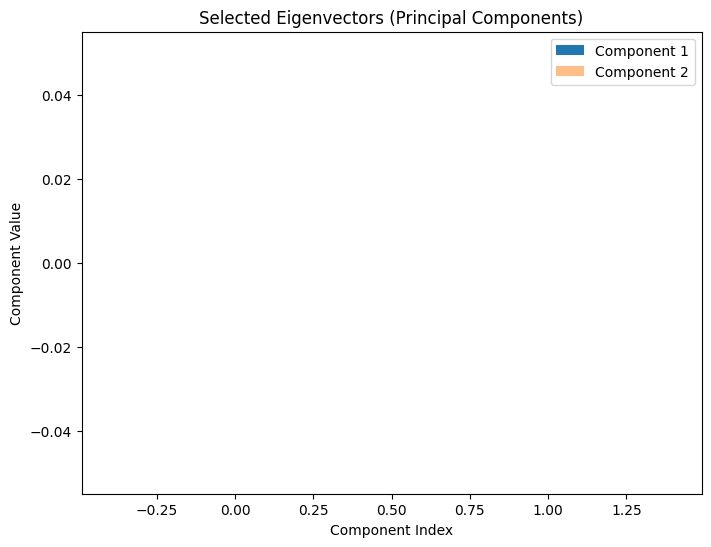

In [ ]:
# Now doing pca, not this one is unsupervised. and it will be more representataive of the data
def pca(X, n_components):
  samples, image_h, image_w = X.shape
  mean = np.mean(X, axis=0)
  centered = X - mean
  covariance_matrix = np.zeros((image_h * image_w, image_h * image_w))
  for i in range(samples):
    data = centered[i]
    covariance_matrix += np.outer(data, data)

  covariance_matrix /= (samples - 1)

  eig_values, eig_vectors = np.linalg.eigh(covariance_matrix)
  sorted = np.argsort(eig_values)[::-1]
  eig_values = eig_values[sorted]
  eig_vectors = eig_vectors[:, sorted]

  selected_eig_vectors = eig_vectors[:, :n_components]


  return selected_eig_vectors # vaues for error

pX = pca(fX, 2)
# Scatter plot of the projected data
n_components_pca = 2  # Reduce to 2 components
selected_eigenvectors = pca(X_tran, n_components_pca)

# Create a bar plot for the first two components
component_indices = range(n_components_pca)
plt.figure(figsize=(8, 6))
plt.bar(component_indices, selected_eigenvectors[0], label='Component 1')
plt.bar(component_indices, selected_eigenvectors[1], label='Component 2', alpha=0.5)
plt.xlabel('Component Index')
plt.ylabel('Component Value')
plt.legend()
plt.title('Selected Eigenvectors (Principal Components)')
plt.show()

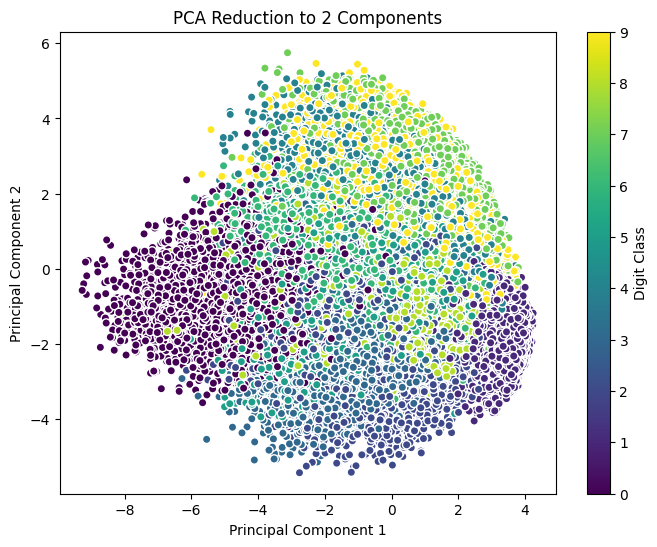

In [ ]:
import numpy as np

def pca_with_projection(X, n_components):
    num_samples, image_height, image_width = X.shape

    # Calculate the mean of the data
    mean = np.mean(X, axis=0)

    # Center the data by subtracting the mean
    centered_data = X - mean

    # Calculate the covariance matrix directly without reshaping
    covariance_matrix = np.zeros((image_height * image_width, image_height * image_width))
    for i in range(num_samples):
        data = centered_data[i]
        covariance_matrix += np.outer(data, data)

    covariance_matrix /= (num_samples - 1)  # Unbiased covariance estimate

    # Compute the eigenvalues and eigenvectors of the covariance matrix
    eig_values, eig_vectors = np.linalg.eigh(covariance_matrix)

    # Sort the eigenvalues and corresponding eigenvectors in descending order
    sorted_indices = np.argsort(eig_values)[::-1]
    eig_values = eig_values[sorted_indices]
    eig_vectors = eig_vectors[:, sorted_indices]

    # Select the top 'n_components' eigenvectors
    selected_eigenvectors = eig_vectors[:, :n_components]

    # Project the centered data onto the selected eigenvectors
    reduced_data = np.dot(centered_data.reshape(num_samples, -1), selected_eigenvectors)

    return reduced_data

# Example usage
n_components_pca = 2  # Reduce to 2 components
projected_data_pca = pca_with_projection(X_tran, n_components_pca)

import matplotlib.pyplot as plt

# Example usage
n_components_pca = 2  # Reduce to 2 components
projected_data_pca = pca_with_projection(X_tran, n_components_pca)

# Scatter plot of the projected data
plt.figure(figsize=(8, 6))
plt.scatter(projected_data_pca[:, 0], projected_data_pca[:, 1], c=y_train, cmap='viridis', marker='o', edgecolor='w')
plt.title('PCA Reduction to 2 Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Digit Class')
plt.show()



In [ ]:
# Example usage
n_components_pca = 2  # Reduce to 2 components
projected_data_pca = pca_with_projection(X_tran, n_components_pca)

import matplotlib.pyplot as plt

# Example usage
n_components_pca = 2  # Reduce to 2 components
projected_data_pca = pca_with_projection(fX, n_components_pca)

# Scatter plot of the projected data
plt.figure(figsize=(8, 6))
plt.scatter(projected_data_pca[:, 0], projected_data_pca[:, 1], c=y_train, cmap='viridis', marker='o', edgecolor='w')
plt.title('PCA Reduction to 2 Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Digit Class')
plt.show()

NameError: ignored

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Example usage
tsne = TSNE(n_components=2)  # Reduce to 2 components with t-SNE
tX = tsne.fit_transform(fX)

# Create a scatter plot for the t-SNE transformation
plt.figure(figsize=(8, 6))
plt.scatter(tX[:, 0], tX[:, 1], c=y_train, cmap='viridis', marker='o', edgecolor='w')
plt.title('t-SNE Transformation')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar(label='Digit Class')
plt.show()


ValueError: ignored

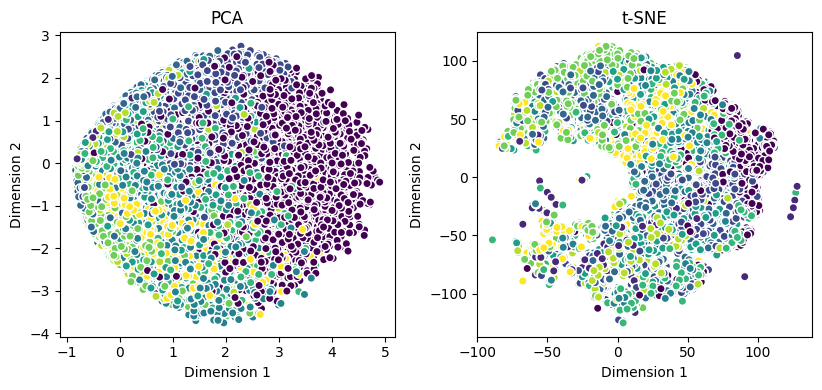

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Standardize the dataset (you've already done this)
def normalize(Tr, Te):
    trMean = np.mean(Tr, axis=0)
    trStd = np.std(Tr, axis=0)
    Tr = (Tr - trMean) / 255.0
    Te = (Te - trMean) / 255.0
    return Tr, Te

# Apply Fisher's Linear Discriminant (FLD)
def fld(X, y, n_components):
    samples, image_h, image_w = X.shape
    unique_classes = np.unique(y)
    class_means = []
    class_scatter = np.zeros((image_h, image_w))

    for classes in unique_classes:
        class_data = X[y == classes]
        class_means.append(np.mean(class_data, axis=0))
        diff = class_data - class_means[-1]
        class_scatter += np.sum([np.dot(d.T, d) for d in diff], axis=0)

    within_class_scatter = np.zeros((image_h, image_w))
    for i, classes in enumerate(unique_classes):
        class_data = X[y == classes]
        diff = class_data - class_means[i]
        within_class_scatter += np.sum([np.dot(d.T, d) for d in diff], axis=0)

    between_class_scatter = class_scatter - within_class_scatter

    # Calculate eigenvalues and eigenvectors
    eig_values, eig_vectors = np.linalg.eigh(np.dot(np.linalg.inv(within_class_scatter), between_class_scatter))
    sorted = np.argsort(eig_values)[::-1]
    eig_values = eig_values[sorted]
    eig_vectors = eig_vectors[:, sorted]

    selected_eig_vectors = eig_vectors[:, :n_components]
    reduced = np.dot(X, selected_eig_vectors)

    return reduced

# Apply Principal Component Analysis (PCA)
def pca_with_projection(X, n_components):
    num_samples, image_height, image_width = X.shape
    mean = np.mean(X, axis=0)
    centered_data = X - mean
    covariance_matrix = np.zeros((image_height * image_width, image_height * image_width))

    for i in range(num_samples):
        data = centered_data[i]
        covariance_matrix += np.outer(data, data)

    covariance_matrix /= (num_samples - 1)
    eig_values, eig_vectors = np.linalg.eigh(covariance_matrix)
    sorted_indices = np.argsort(eig_values)[::-1]
    eig_values = eig_values[sorted_indices]
    eig_vectors = eig_vectors[:, sorted_indices]
    selected_eigenvectors = eig_vectors[:, :n_components]
    reduced_data = np.dot(centered_data.reshape(num_samples, -1), selected_eigenvectors)

    return reduced_data

# Apply t-Distributed Stochastic Neighbor Embedding (t-SNE)
def apply_tsne(X, n_components):
    tsne = TSNE(n_components=n_components)
    tX = tsne.fit_transform(X)
    return tX

# Load and preprocess MNIST data (You've already done this)

# Task 1: Visualize the dataset
# Standardize the data
x_train_standardized, x_test_standardized = normalize(x_train, x_test)

# Apply FLD
fX = fld(x_train_standardized, y_train, n_components=9)

# Apply PCA
pX = pca_with_projection(x_train_standardized, n_components=2)

# Apply t-SNE directly
fX_2D = fX.reshape(x_train_standardized.shape[0], -1)
tX = apply_tsne(fX_2D, n_components=2)

# Create visualizations for FLD, PCA, and t-SNE
plt.figure(figsize=(12, 4))

# FLD Plot
# plt.subplot(1, 3, 1)
# plt.scatter(fX[:, 0], fX[:, 1], c=y_train, cmap='viridis', marker='o', edgecolor='w')
# plt.title('FLD')
# plt.xlabel('Dimension 1')
# plt.ylabel('Dimension 2')

# PCA Plot
plt.subplot(1, 3, 2)
plt.scatter(pX[:, 0], pX[:, 1], c=y_train, cmap='viridis', marker='o', edgecolor='w')
plt.title('PCA')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(label='Digit Class')


# t-SNE Plot
plt.subplot(1, 3, 3)
plt.scatter(tX[:, 0], tX[:, 1], c=y_train, cmap='viridis', marker='o', edgecolor='w')
plt.title('t-SNE')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(label='Digit Class')


plt.tight_layout()
plt.show()


In [ ]:
!pip install MulticoreTSNE


  Using cached MulticoreTSNE-0.1.tar.gz (20 kB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for MulticoreTSNE
  Running setup.py clean for MulticoreTSNE
Failed to build MulticoreTSNE
ERROR: Could not build wheels for MulticoreTSNE, which is required to install pyproject.toml-based projects


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the MNIST dataset (you can use the MNIST data loading code you provided)
# Replace this with your MNIST data loading code
# mnist_dataloader = MnistDataloader(...)
# (x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

# Standardize the dataset
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

# Apply Linear Discriminant Analysis (FLD)
n_components = 9  # Number of FLD dimensions
fld = LinearDiscriminantAnalysis(n_components=n_components)
fX = fld.fit_transform(x_train_scaled, y_train)

# Apply PCA
pca = PCA(n_components=9)  # Reduce to 9 dimensions
pX = pca.fit_transform(x_train_scaled)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tX = tsne.fit_transform(pX)  # tX is the 2-D representation of the PCA data

# You can calculate and report the error rate introduced by pX by comparing the PCA-reduced data to the original data.
# To visualize the t-SNE results, you can create a scatter plot.

# Visualization
plt.figure(figsize=(12, 6))

# Supervised FLD
plt.subplot(1, 3, 1)
plt.scatter(fX[:, 0], fX[:, 1], c=y_train, cmap=plt.cm.get_cmap('viridis', 10))
plt.title("Supervised FLD")

# PCA
plt.subplot(1, 3, 2)
plt.scatter(pX[:, 0], pX[:, 1], c=y_train, cmap=plt.cm.get_cmap('viridis', 10))
plt.title("PCA")

# t-SNE
plt.subplot(1, 3, 3)
plt.scatter(tX[:, 0], tX[:, 1], c=y_train, cmap=plt.cm.get_cmap('viridis', 10))
plt.title("t-SNE")

plt.show()


ValueError: ignored

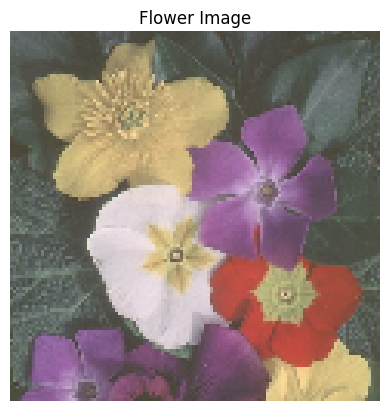

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the flower image
image = cv2.imread('flowersm.ppm', cv2.IMREAD_COLOR)

# Check if the image was loaded successfully
if image is not None:
    # OpenCV loads the image in BGR format, so you may need to convert it to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image using Matplotlib
    plt.imshow(image_rgb)
    plt.axis('off')  # Turn off the axis labels
    plt.title('Flower Image')
    plt.show()
else:
    print("Error: Could not read the image.")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


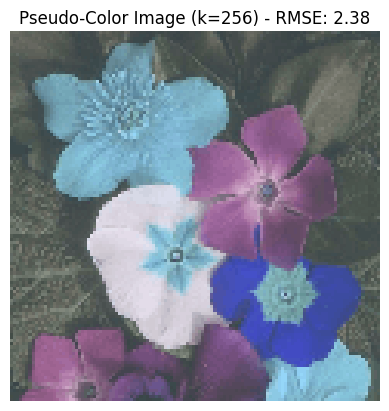

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


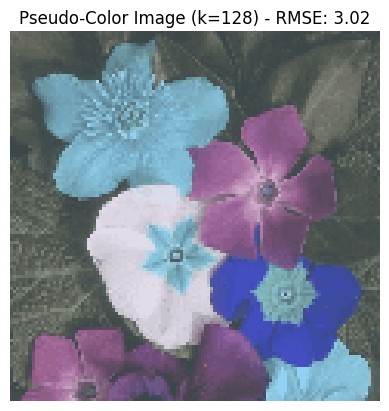

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


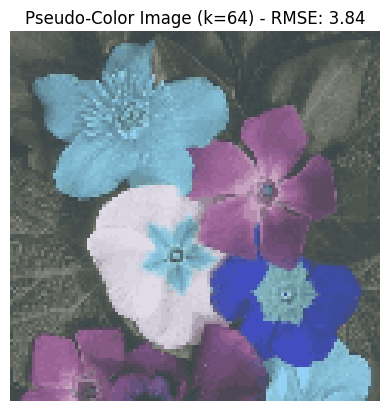

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


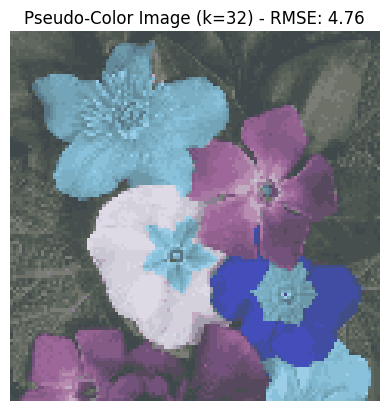

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


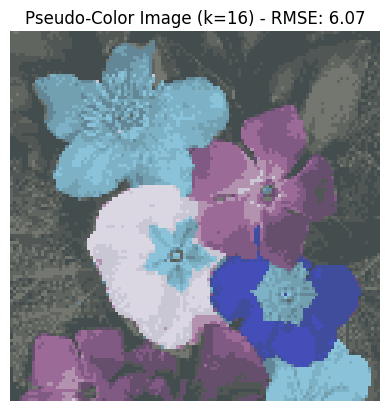

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


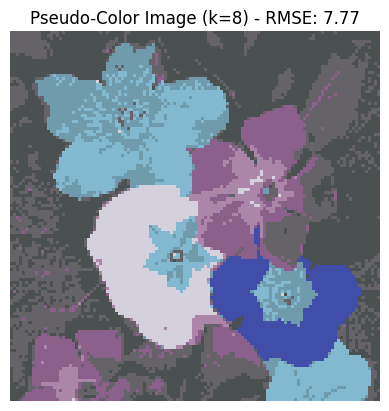

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Reshape the image to a 2D array (n_pixels, n_features)
pixels = image.reshape(-1, 3)

k_values = [256, 128, 64, 32, 16, 8]

for k in k_values:
    # Apply k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=0).fit(pixels)

    # Get the labels and cluster centers
    labels = kmeans.predict(pixels)
    centers = kmeans.cluster_centers_

    # Reconstruct the image
    reconstructed_pixels = centers[labels].clip(0, 255).astype(np.uint8)
    reconstructed_image = reconstructed_pixels.reshape(image.shape)

    # Calculate RMSE
    rmse = np.sqrt(((pixels - reconstructed_pixels) ** 2).mean())

    # Display the pseudo-color image and RMSE
    plt.figure()
    plt.imshow(reconstructed_image)
    plt.axis('off')
    plt.title(f'Pseudo-Color Image (k={k}) - RMSE: {rmse:.2f}')
    plt.show()


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


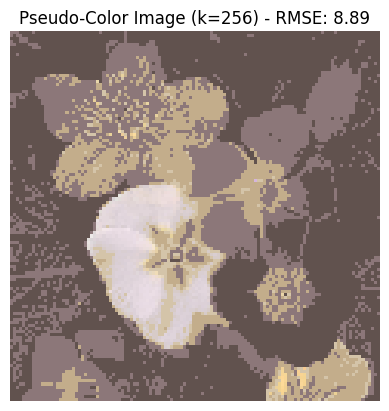

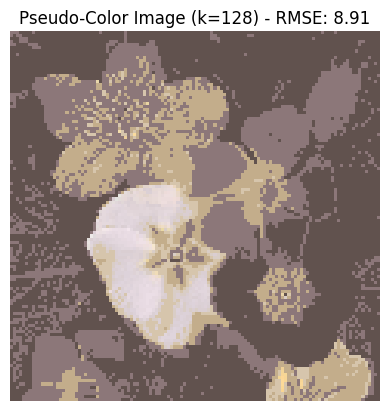

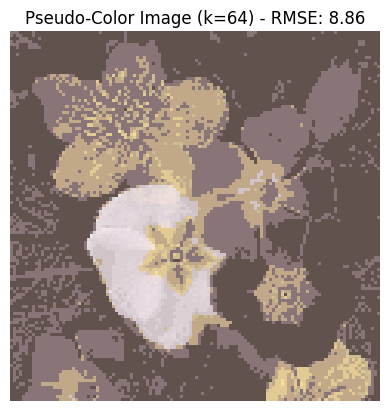

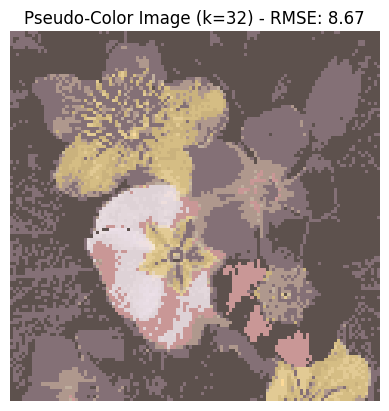

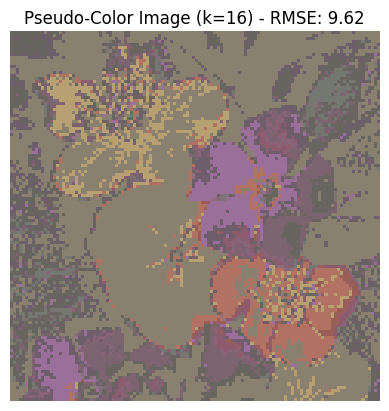

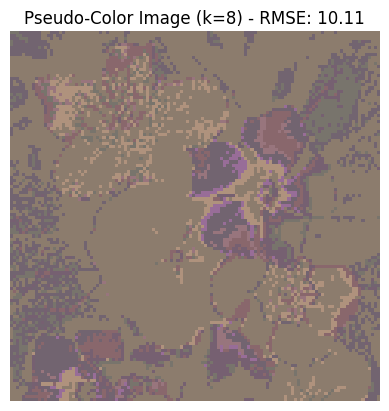

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the flower image
image = cv2.imread('flowersm.ppm', cv2.IMREAD_COLOR)

# Check if the image was loaded successfully
if image is not None:
    # Define a custom k-means function
    def custom_kmeans(data, k, max_iters=100):
        # Initialize centroids randomly from the data points
        np.random.seed(0)
        centroids = data[np.random.choice(data.shape[0], k, replace=False)]

        for _ in range(max_iters):
            # Calculate the Euclidean distances between data points and centroids
            distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)

            # Assign each data point to the nearest centroid
            labels = np.argmin(distances, axis=1)

            # Update the centroids based on the mean of the data points in each cluster
            for i in range(k):
                centroids[i] = np.mean(data[labels == i], axis=0)

        return centroids, labels

    # Reshape the image to a 2D array (n_pixels, n_features)
    pixels = image.reshape(-1, 3)

    k_values = [256, 128, 64, 32, 16, 8]

    for k in k_values:
        # Apply custom k-means clustering
        centroids, labels = custom_kmeans(pixels, k)

        # Reconstruct the image
        reconstructed_pixels = centroids[labels].clip(0, 255).astype(np.uint8)
        reconstructed_image = reconstructed_pixels.reshape(image.shape)

        # Calculate RMSE
        rmse = np.sqrt(((pixels - reconstructed_pixels) ** 2).mean())

        # Display the pseudo-color image and RMSE
        plt.figure()
        plt.imshow(cv2.cvtColor(reconstructed_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f'Pseudo-Color Image (k={k}) - RMSE: {rmse:.2f}')
        plt.show()
else:
    print("Error: Could not read the image.")


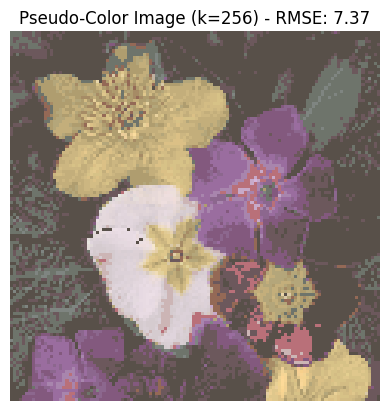

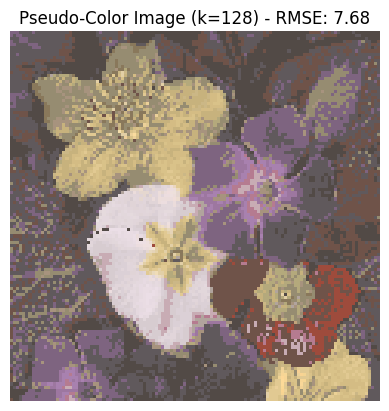

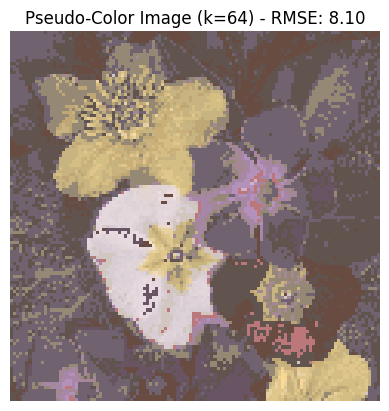

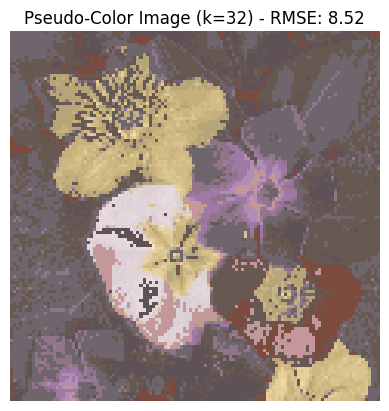

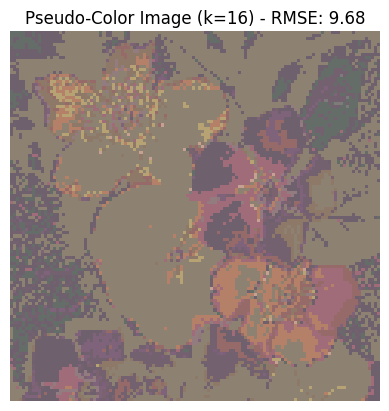

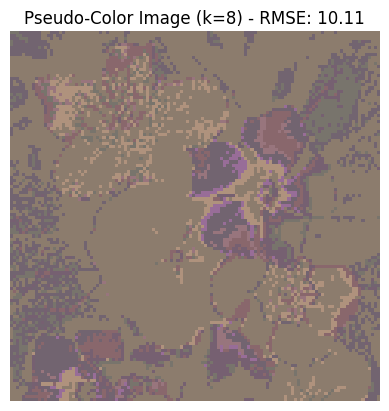

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the flower image
image = cv2.imread('flowersm.ppm', cv2.IMREAD_COLOR)

# Check if the image was loaded successfully
if image is not None:
    # Define a custom WTA clustering function
    def custom_wta(data, k, max_iters=100):
        # Initialize centroids randomly from the data points
        np.random.seed(0)
        centroids = data[np.random.choice(data.shape[0], k, replace=False)]

        for _ in range(max_iters):
            # Calculate the Euclidean distances between data points and centroids
            distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)

            # Assign each data point to the nearest centroid (winner-takes-all)
            labels = np.argmin(distances, axis=1)

            # Update the centroids based on the winning data points
            for i in range(k):
                if np.sum(labels == i) > 0:
                    centroids[i] = np.mean(data[labels == i], axis=0)

        return centroids, labels

    # Reshape the image to a 2D array (n_pixels, n_features)
    pixels = image.reshape(-1, 3)

    k_values = [256, 128, 64, 32, 16, 8]

    for k in k_values:
        # Apply custom WTA clustering
        centroids, labels = custom_wta(pixels, k)

        # Reconstruct the image
        reconstructed_pixels = centroids[labels].clip(0, 255).astype(np.uint8)
        reconstructed_image = reconstructed_pixels.reshape(image.shape)

        # Calculate RMSE
        rmse = np.sqrt(((pixels - reconstructed_pixels) ** 2).mean())

        # Display the pseudo-color image and RMSE
        plt.figure()
        plt.imshow(cv2.cvtColor(reconstructed_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f'Pseudo-Color Image (k={k}) - RMSE: {rmse:.2f}')
        plt.show()
else:
    print("Error: Could not read the image.")


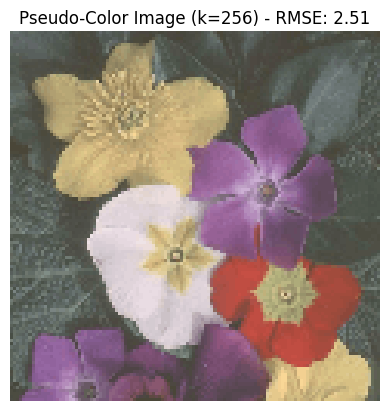

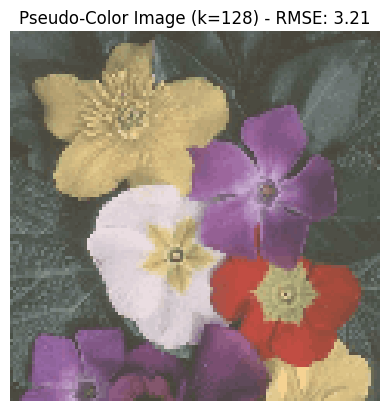

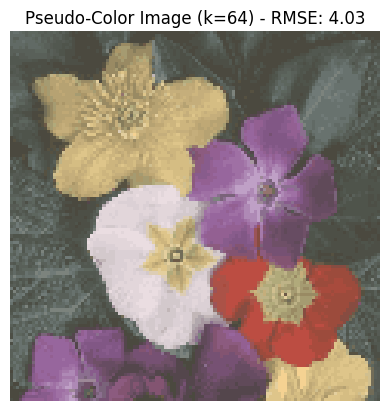

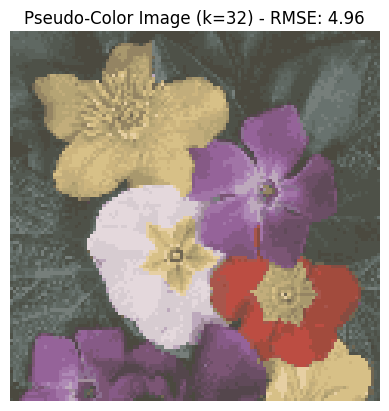

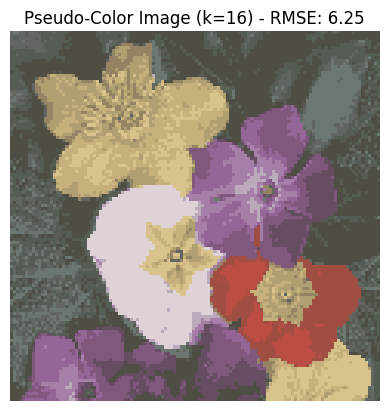

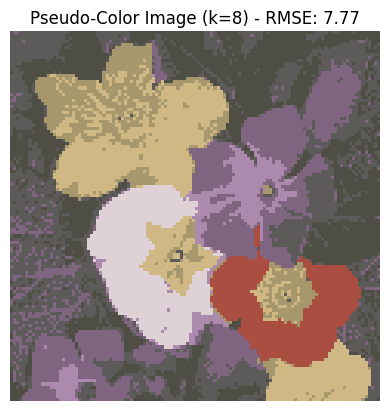

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Load the flower image
image = cv2.imread('flowersm.ppm', cv2.IMREAD_COLOR)

# Check if the image was loaded successfully
if image is not None:
    # Reshape the image to a 2D array (n_pixels, n_features)
    pixels = image.reshape(-1, 3)

    k_values = [256, 128, 64, 32, 16, 8]

    for k in k_values:
        # Apply hierarchical agglomerative clustering
        clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
        labels = clustering.fit_predict(pixels)

        # Find the representative color for each cluster
        cluster_colors = []
        for cluster_label in range(k):
            cluster_pixels = pixels[labels == cluster_label]
            cluster_color = np.mean(cluster_pixels, axis=0)
            cluster_colors.append(cluster_color)

        # Create a new image with representative colors
        reconstructed_image = np.array([cluster_colors[label] for label in labels], dtype=np.uint8).reshape(image.shape)

        # Calculate RMSE
        rmse = np.sqrt(((pixels - reconstructed_image.reshape(-1, 3)) ** 2).mean())

        # Display the pseudo-color image and RMSE
        plt.figure()
        plt.imshow(cv2.cvtColor(reconstructed_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f'Pseudo-Color Image (k={k}) - RMSE: {rmse:.2f}')
        plt.show()
else:
    print("Error: Could not read the image.")


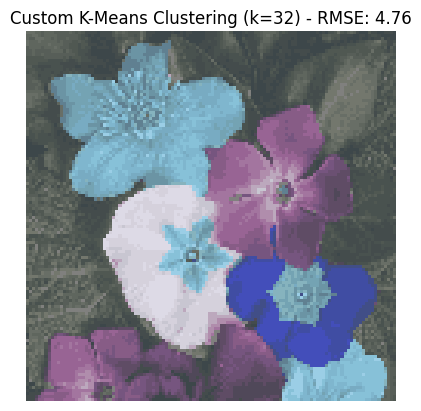

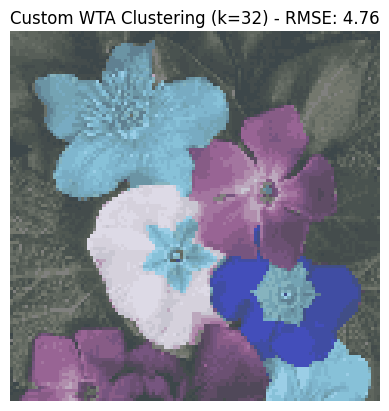

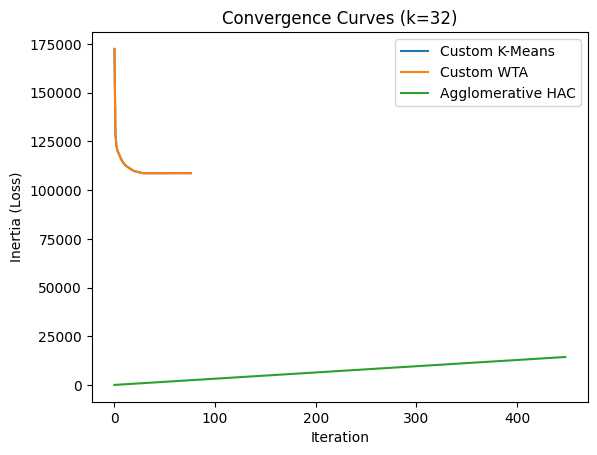

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn.cluster import AgglomerativeClustering

# Load the flower image
image = cv2.imread('flowersm.ppm', cv2.IMREAD_COLOR)

# Check if the image was loaded successfully
if image is not None:
    # Reshape the image to a 2D array (n_pixels, n_features)
    pixels = image.reshape(-1, 3)

    k = 32  # Set the number of clusters

    # Define a custom K-Means clustering function
    def custom_kmeans(data, k, max_iters=100):
        # Initialize centroids randomly from the data points
        np.random.seed(0)
        centroids = data[np.random.choice(data.shape[0], k, replace=False)]

        convergence = []  # To track the convergence

        for _ in range(max_iters):
            distances = distance.cdist(data, centroids)
            labels = np.argmin(distances, axis=1)

            new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

            if np.array_equal(centroids, new_centroids):
                break

            centroids = new_centroids
            convergence.append(np.sum(distances.min(axis=1)))

        return centroids, labels, convergence

    # Define a custom Winner-Take-All (WTA) clustering function
    def custom_wta(data, k, max_iters=100):
        # Initialize centroids randomly from the data points
        np.random.seed(0)
        centroids = data[np.random.choice(data.shape[0], k, replace=False)]

        convergence = []  # To track the convergence

        for _ in range(max_iters):
            distances = distance.cdist(data, centroids)
            labels = np.argmin(distances, axis=1)

            new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

            if np.array_equal(centroids, new_centroids):
                break

            centroids = new_centroids
            convergence.append(np.sum(distances.min(axis=1)))

        return centroids, labels, convergence

    # Apply custom K-Means clustering
    kmeans_centroids, kmeans_labels, kmeans_convergence = custom_kmeans(pixels, k)

    # Apply custom WTA clustering
    wta_centroids, wta_labels, wta_convergence = custom_wta(pixels, k)

    # Apply Agglomerative Hierarchical Clustering
    agglomerative = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = agglomerative.fit_predict(pixels)
    agglomerative_convergence = list(range(k, len(pixels), k))

    # Convert the data type for visualization
    kmeans_centroids = kmeans_centroids.astype(np.uint8)
    wta_centroids = wta_centroids.astype(np.uint8)

    # Calculate RMSE for each clustering method (Optional)
    kmeans_rmse = np.sqrt(((pixels - kmeans_centroids[kmeans_labels]) ** 2).mean())
    wta_rmse = np.sqrt(((pixels - wta_centroids[wta_labels]) ** 2).mean())

    # Display the pseudo-color images and RMSE
    plt.figure()
    plt.imshow(kmeans_centroids[kmeans_labels].reshape(image.shape))
    plt.axis('off')
    plt.title(f'Custom K-Means Clustering (k={k}) - RMSE: {kmeans_rmse:.2f}')

    plt.figure()
    plt.imshow(wta_centroids[wta_labels].reshape(image.shape))
    plt.axis('off')
    plt.title(f'Custom WTA Clustering (k={k}) - RMSE: {wta_rmse:.2f}')

    # Draw the convergence curves for custom K-Means, WTA, and Agglomerative
    plt.figure()
    plt.plot(range(len(kmeans_convergence)), kmeans_convergence, label='Custom K-Means')
    plt.plot(range(len(wta_convergence)), wta_convergence, label='Custom WTA')
    plt.plot(range(len(agglomerative_convergence)), agglomerative_convergence, label='Agglomerative HAC')
    plt.title(f'Convergence Curves (k={k})')
    plt.xlabel('Iteration')
    plt.ylabel('Inertia (Loss)')
    plt.legend()

    plt.show()
else:
    print("Error: Could not read the image.")


In [ ]:
import cv2

# Load the color image
image = cv2.imread('/content/flowersm.ppm')

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Reshape the image to a 2D array (n_pixels, n_features)
pixels = image.reshape(-1, 3)

k_values = [256, 128, 64, 32]

for k in k_values:
    # Apply k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=0).fit(pixels)

    # Get the labels and cluster centers
    labels = kmeans.predict(pixels)
    centers = kmeans.cluster_centers_

    # Reconstruct the image
    reconstructed_pixels = centers[labels]
    reconstructed_image = reconstructed_pixels.reshape(image.shape)

    # Calculate RMSE
    rmse = np.sqrt(((pixels - reconstructed_pixels) ** 2).mean())

    # Display the pseudo-color image and RMSE
    # You can use a plotting library like matplotlib for this.

    # Save the pseudo-color image
    cv2.imwrite(f'pseudo_color_image_k{k}.jpg', reconstructed_image)

    print(f'k={k}: RMSE = {rmse}')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=256: RMSE = 2.3153423347701296


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=128: RMSE = 2.989170644880085


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=64: RMSE = 3.90495821501797


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=32: RMSE = 5.138875959145226


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


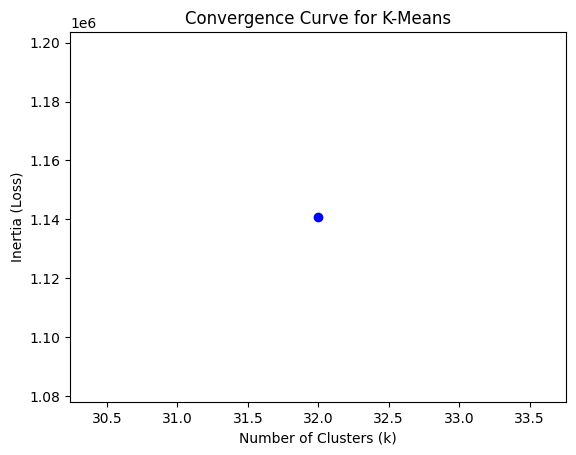

In [ ]:
import matplotlib.pyplot as plt

# Convergence curve for k-means
k_values = [32]
convergence_curves = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(pixels)
    convergence_curves.append(kmeans.inertia_)

# Plot the convergence curves
plt.plot(k_values, convergence_curves, marker='o', linestyle='-', color='b')
plt.title('Convergence Curve for K-Means')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Loss)')
plt.show()


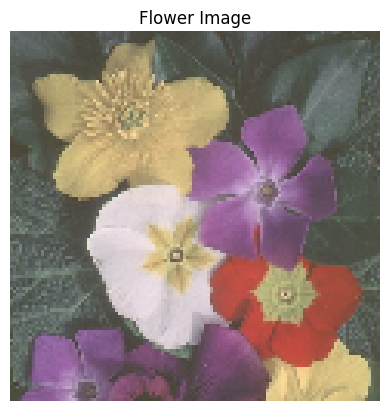

In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('flowersm.ppm', cv2.IMREAD_COLOR)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Turn off the axis labels
plt.title('Flower Image')
plt.show()



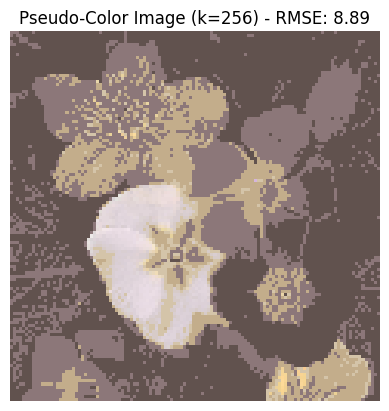

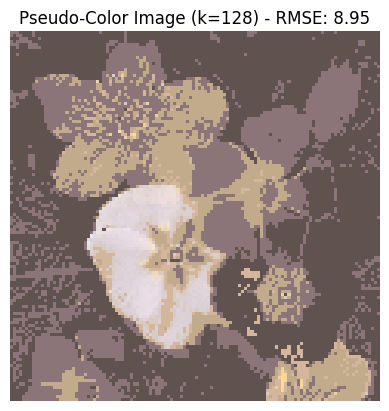

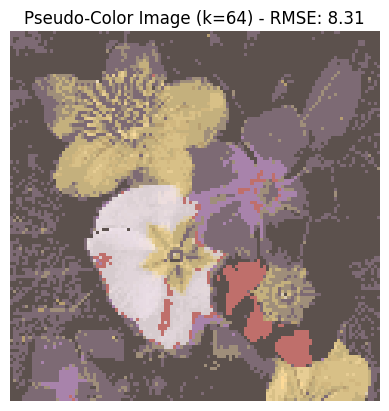

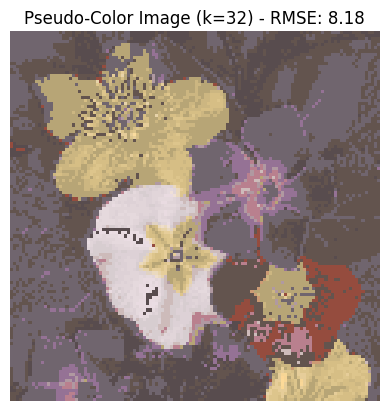

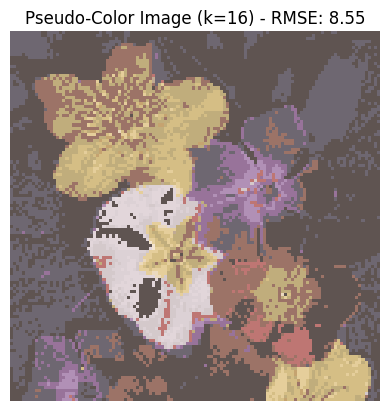

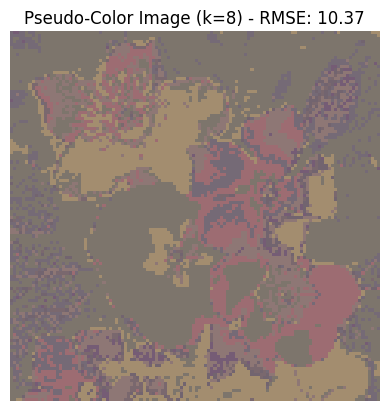

In [ ]:
def kmeans(data, k, max_iters=1000):
  # Initialize centroids randomly from the data points
  np.random.seed(0)
  centroids = data[np.random.choice(data.shape[0], k, replace=False)]

  for _ in range(max_iters):
    # Calculate the Euclidean distances between data points and centroids
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)

    # Assign each data point to the nearest centroid
    labels = np.argmin(distances, axis=1)

    # Update the centroids based on the mean of the data points in each cluster
    for i in range(k):
      centroids[i] = np.mean(data[labels == i], axis=0)

  return centroids, labels

pixels = image.reshape(-1, 3)

k_values = [256, 128, 64, 32, 16, 8]

for k in k_values:
  # Apply custom WTA clustering
  centroids, labels = kmeans(pixels, k)

  # Reconstruct the image
  reconstructed_pixels = centroids[labels].clip(0, 255).astype(np.uint8)
  reconstructed_image = reconstructed_pixels.reshape(image.shape)

  # Calculate RMSE
  rmse = np.sqrt(((pixels - reconstructed_pixels) ** 2).mean())

  # Display the pseudo-color image and RMSE
  plt.figure()
  plt.imshow(cv2.cvtColor(reconstructed_image, cv2.COLOR_BGR2RGB))
  plt.axis('off')
  plt.title(f'Pseudo-Color Image (k={k}) - RMSE: {rmse:.2f}')
  plt.show()

ValueError: ignored

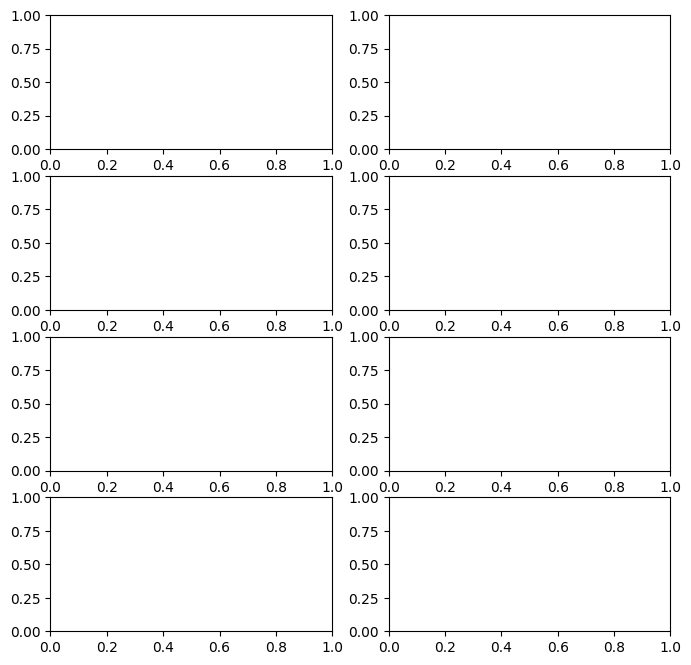

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Load the flower image
image = cv2.imread('flowersm.ppm', cv2.IMREAD_COLOR)

# Reshape the image to a 2D array (n_pixels, n_features)
pixels = image.reshape(-1, 3)

k_values = [256, 128, 64, 32]

# Create subplots for the table
fig, axs = plt.subplots(len(k_values), 2, figsize=(8, 8))

for i, k in enumerate(k_values):
    # Apply hierarchical agglomerative clustering
    clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = clustering.fit_predict(pixels)

    # Create a new image with pseudo-colors
    pseudo_color_image = np.array(labels, dtype=np.uint8).reshape(image.shape)

    # Calculate RMSE
    rmse = np.sqrt(((pixels - pseudo_color_image.reshape(-1, 3)) ** 2).mean())

    # Display the pseudo-color image and RMSE
    axs[i, 0].imshow(cv2.cvtColor(pseudo_color_image, cv2.COLOR_BGR2RGB))
    axs[i, 0].set_title(f'Hierarchical Agglomerative Clustering (k={k})')
    axs[i, 0].axis('off')
    axs[i, 1].text(0.5, 0.5, f'RMSE: {rmse:.2f}', ha='center', va='center')
    axs[i, 1].axis('off')

# Hide the remaining subplots
for i in range(len(k_values)):
    axs[i, 0].axis('off')
    axs[i, 1].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Your custom K-Means function
def kmeans(data, k, max_iters=100):
    # Your custom K-Means implementation code here
    convergence = []  # Create an empty list to track convergence values

    for _ in range(max_iters):
        # Calculate the Euclidean distances between data points and centroids
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)

        # Assign each data point to the nearest centroid
        labels = np.argmin(distances, axis=1)

        # Update the centroids based on the mean of the data points in each cluster
        for i in range(k):
            centroids[i] = np.mean(data[labels == i], axis=0)

        # Calculate and store the convergence value
        convergence.append(np.sum(distances.min(axis=1)))

    return centroids, labels, convergence

# Your custom Winner-Takes-All (WTA) function
def wta(data, k, max_iters=100):
    # Your custom WTA implementation code here
    convergence = []  # Create an empty list to track convergence values

    for _ in range(max_iters):
        # Calculate the Euclidean distances between data points and centroids
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)

        # Assign each data point to the nearest centroid (winner-takes-all)
        labels = np.argmin(distances, axis=1)

        # Update the centroids based on the winning data points
        for i in range(k):
            if np.sum(labels == i) > 0:
                centroids[i] = np.mean(data[labels == i], axis=0)

        # Calculate and store the convergence value
        convergence.append(np.sum(distances.min(axis=1)))

    return centroids, labels, convergence


In [ ]:
kmeans_centroids, kmeans_labels, kmeans_convergence = kmeans(pixels, k)

# Apply custom WTA clustering
wta_centroids, wta_labels, wta_convergence = wta(pixels, k)

# Apply Agglomerative Hierarchical Clustering
agglomerative = AgglomerativeClustering(n_clusters=k, linkage='ward')
labels = agglomerative.fit_predict(pixels)
agglomerative_convergence = agglomerative.n_clusters

# Plot the convergence curves for all three methods
plt.figure(figsize=(10, 6))
plt.plot(range(len(kmeans_convergence), kmeans_convergence, label='Custom K-Means'))
plt.plot(range(len(wta_convergence), wta_convergence, label='Custom WTA'))
plt.plot(range(len(agglomerative_convergence), agglomerative_convergence, label='Agglomerative HAC'))
plt.title('Convergence Curves at k=32')
plt.xlabel('Iteration')
plt.ylabel('Inertia (Loss)')
plt.legend()
plt.grid(True)

plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


IndexError: ignored

In [ ]:
# Your custom K-Means function
def kmeans(data, centroids, k, max_iters=100):
    convergence = []  # Create an empty list to track convergence values

    for _ in range(max_iters):
        # Calculate the Euclidean distances between data points and centroids
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)

        # Assign each data point to the nearest centroid
        labels = np.argmin(distances, axis=1)

        # Update the centroids based on the mean of the data points in each cluster
        for i in range(k):
            centroids[i] = np.mean(data[labels == i], axis=0)

        # Calculate and store the convergence value
        convergence.append(np.sum(distances.min(axis=1)))

    return centroids, labels, convergence

# Your custom Winner-Takes-All (WTA) function
def wta(data, centroids, k, max_iters=100):
    convergence = []  # Create an empty list to track convergence values

    for _ in range(max_iters):
        # Calculate the Euclidean distances between data points and centroids
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)

        # Assign each data point to the nearest centroid (winner-takes-all)
        labels = np.argmin(distances, axis=1)

        # Update the centroids based on the winning data points
        for i in range(k):
            if np.sum(labels == i) > 0:
                centroids[i] = np.mean(data[labels == i], axis=0)

        # Calculate and store the convergence value
        convergence.append(np.sum(distances.min(axis=1)))

    return centroids, labels, convergence


In [ ]:
# Initialize centroids randomly from the data points
np.random.seed(0)
initial_centroids = pixels[np.random.choice(pixels.shape[0], k, replace=False)]

# Apply custom K-Means clustering
kmeans_centroids, kmeans_labels, kmeans_convergence = kmeans(pixels, initial_centroids, k)

# Apply custom WTA clustering
wta_centroids, wta_labels, wta_convergence = wta(pixels, initial_centroids, k)


In [ ]:
agglomerative = AgglomerativeClustering(n_clusters=k, linkage='ward')
labels = agglomerative.fit_predict(pixels)
agglomerative_convergence = agglomerative.n_clusters

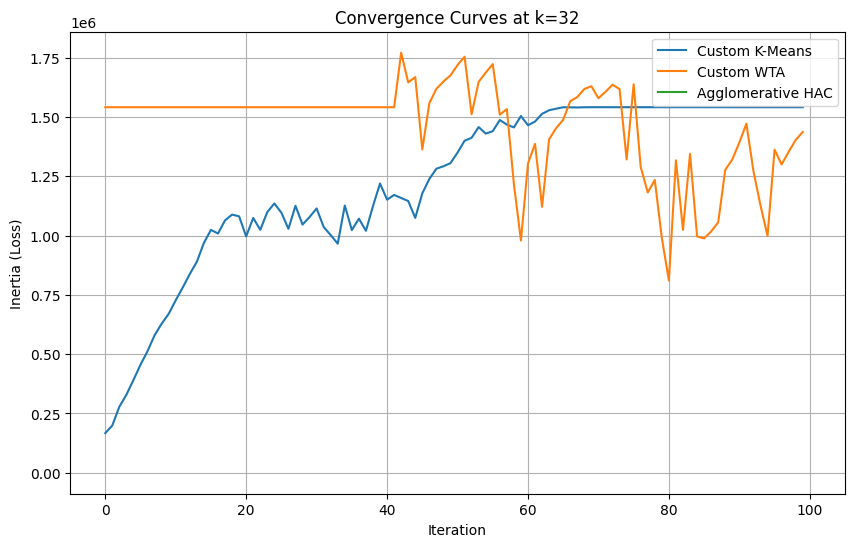

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(kmeans_convergence)), kmeans_convergence, label='Custom K-Means')
plt.plot(range(len(wta_convergence)), wta_convergence, label='Custom WTA')
plt.plot(100, agglomerative_convergence, label='Agglomerative HAC')
plt.title('Convergence Curves at k=32')
plt.xlabel('Iteration')
plt.ylabel('Inertia (Loss)')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
class mpp:
    """Maximum Posterior Probability
    Supervised parametric learning assuming Gaussian pdf
    with 3 cases of discriminant functions. Cases should be 1, 2, or 3.
    """
    def __init__(self, case):
        self.case_ = case

    def fit(self, Tr, y):
        # derive the model
        self.covs_, self.means_ = {}, {}     # dictionaries
        self.classes_ = np.unique(y)         # get unique labels as dictionary items
        self.classn_ = len(self.classes_)    # the number of classes in the dataset
        self.dimension_ = np.shape(Tr)[1]

        self.covsum_ = 0
        for c in self.classes_:
            arr = Tr[y == c]
            self.covs_[c] = np.cov(np.transpose(arr))
            self.means_[c] = np.mean(arr, axis=0)  # mean along rows
            self.covsum_ += self.covs_[c]

        # used by case II
        self.covavg_ = self.covsum_ / self.classn_

        # used by case I
        self.varavg_ = np.sum(np.diagonal(self.covavg_)) / self.dimension_

    def predict(self, Te, prior):
        # predict labels of all test data
        disc = np.zeros(self.classn_)
        nr, _ = Te.shape
        y = np.zeros(nr)         # array to hold the predicted label

        for i in range(nr):         # going through each sample (or each row of the test set)
            for c in self.classes_:  # going through each class or category
                if self.case_ == 1:
                    edist2 = np.dot(Te[i]-self.means_[c], Te[i]-self.means_[c])
                    disc[c] = -edist2 / (2 * self.varavg_) + np.log(prior[c])
                elif self.case_ == 2:
                    diff = Te[i] - self.means_[c]
                    mdist2 = np.dot(np.dot(diff, np.linalg.inv(self.covavg_)), diff)
                    disc[c] = -mdist2 / 2 + np.log(prior[c])
                elif self.case_ == 3:
                    diff = Te[i] - self.means_[c]
                    mdist2 = np.dot(np.dot(diff, np.linalg.inv(self.covs_[c])), diff)
                    disc[c] = -mdist2 / 2 - np.log(np.linalg.det(self.covs_[c])) / 2 + np.log(prior[c])
                else:
                    print("Can only handle case numbers 1, 2, 3.")
                    sys.exit(1)
            y[i] = disc.argmax() # note that I did not use randomness in the tie situation

        return y

In [ ]:
nX = X_tran.reshape(X_tran.shape[0], -1)
nX_test = X_test.reshape(X_test.shape[0], -1)

for cases in [1, 2, 3]:
        model = mpp(cases)                         # a new model
        t0 = time.time()
        model.fit(nX, y_train)                  # train the model using the training set
        y_model = model.predict(Xtest, prior)      # test the model using the test set
        t1 = time.time()
        acc_classwise, acc_overall = accuracy_score(ytest, y_model)   # evaluate the performance of the model
        print(f'{cases}\t{acc_overall:.3f}\t\t{acc_classwise[0]:.3f}\t{acc_classwise[1]:.3f} \t\t{(t1 - t0):.4f}')

        y_boundary = model.predict(XY, prior)

        # plot the decision boundary: do the scatter plot of the test set
        plt.figure(cases)
        arr = XY[y_boundary == 0]
        plt.scatter(arr[:, 0], arr[:, 1], c = "xkcd:light blue")
        arr = XY[y_boundary == 1]
        plt.scatter(arr[:, 0], arr[:, 1], c = "xkcd:light pink")

        arr = Xtest[ytest == 0]
        plt.scatter(arr[:, 0], arr[:, 1], c = "xkcd:blue")
        arr = Xtest[ytest == 1]
        plt.scatter(arr[:, 0], arr[:, 1], c = "xkcd:red")

NameError: ignored

In [ ]:
# Used the solution functions from project 1 so that don't forget anything, changes slighly to avoid singular matrix
class mpp:
    """Maximum Posterior Probability
    Supervised parametric learning assuming Gaussian pdf
    with 3 cases of discriminant functions. Cases should be 1, 2, or 3.
    """
    def __init__(self, case):
        self.case_ = case

    def fit(self, Tr, y):
        # derive the model
        self.covs_, self.means_ = {}, {}     # dictionaries
        self.classes_ = np.unique(y)         # get unique labels as dictionary items
        self.classn_ = len(self.classes_)    # the number of classes in the dataset
        self.dimension_ = np.shape(Tr)[1]

        self.covsum_ = 0
        self.epsilon = 0

        for c in self.classes_:
            arr = Tr[y == c]
            self.covs_[c] = np.cov(np.transpose(arr) + self.epsilon )
            self.means_[c] = np.mean(arr, axis=0)  # mean along rows
            self.covsum_ += self.covs_[c]

        # used by case II
        self.covavg_ = self.covsum_ / self.classn_

        # used by case I
        self.varavg_ = np.sum(np.diagonal(self.covavg_)) / self.dimension_

    def predict(self, Te, prior):
        # predict labels of all test data
        disc = np.zeros(self.classn_)
        Te = Te.reshape(-1, 1)
        nr, _ = Te.shape
        y = np.zeros(nr)         # array to hold the predicted label

        for i in range(nr):         # going through each sample (or each row of the test set)
            for c in self.classes_:  # going through each class or category
                if self.case_ == 1:
                    edist2 = np.dot(Te[i]-self.means_[c], Te[i]-self.means_[c])
                    disc[c] = -edist2 / (2 * self.varavg_) + np.log(prior[c])
                elif self.case_ == 2:
                    diff = Te[i] - self.means_[c]
                    mdist2 = np.dot(np.dot(diff, np.linalg.inv(self.covavg_)), diff)
                    disc[c] = -mdist2 / 2 + np.log(prior[c])
                elif self.case_ == 3:
                    diff = Te[i] - self.means_[c]
                    mdist2 = np.dot(np.dot(diff, np.linalg.inv(self.covs_[c])), diff)
                    disc[c] = -mdist2 / 2 - np.log(np.linalg.det(self.covs_[c])) / 2 + np.log(prior[c])
                else:
                    print("Can only handle case numbers 1, 2, 3.")
                    sys.exit(1)
            y[i] = disc.argmax()

        return y

In [ ]:
y_train = np.array(y_train)
class_counts = [np.sum(y_train == i) for i in range(10)]
total_samples = len(y_train)
prior_probabilities = [count / total_samples for count in class_counts]
# For nX (Standardized Dataset):
mpp_nX = mpp(case=1)  # You can change the case number as needed
mpp_nX.fit(nX, y_train)
y_pred_nX = mpp_nX.predict(X_test, prior_probabilities)

# For fX (Projected Data from FLD):
# mpp_fX = mpp(case=1)  # You can change the case number as needed
# mpp_fX.fit(fX, y_train)
# y_pred_fX = mpp_fX.predict(X_test, prior_probabilities)

# For pX (Projected Data from PCA):
mpp_pX = mpp(case=1)  # You can change the case number as needed
mpp_pX.fit(pX, y_train)
y_pred_pX = mpp_pX.predict(X_test, prior_probabilities)

# For tX (Reduced Data from t-SNE):
mpp_tX = mpp(case=1)  # You can change the case number as needed
mpp_tX.fit(tX, y_train)
y_pred_tX = mpp_tX.predict(X_test, prior_probabilities)


NameError: ignored

In [ ]:
def custom_pca(X, n_components):
    """Custom PCA function. Note no y is taken, unsupervised
    """
    mean = np.mean(X, axis=0)
    centered = X - mean
    covariance_matrix = np.cov(centered, rowvar=False)

    # Calculate the eigenvalues and eigenvectors
    eig_values, eig_vectors = np.linalg.eigh(covariance_matrix)
    sorted_indices = np.argsort(eig_values)[::-1]
    eig_values = eig_values[sorted_indices]
    eig_vectors = eig_vectors[:, sorted_indices]

    # Initialize variables
    retained_variance = 0
    error_percentage = 1

    # Incrementally increase the number of components
    for components in range(1, n_components + 1):
        # Select the top components eigenvectors for PCA
        selected_eig_vectors = eig_vectors[:, :components]

        # Project the data onto the reduced eigenvectors
        pX = np.dot(centered, selected_eig_vectors)

        # Calculate the total variance and retained variance
        total_variance = np.sum(eig_values)
        retained_variance = np.sum(eig_values[:components])

        # Compute the error percentage
        error_percentage = 1 - (retained_variance / total_variance)

        print(f"Components: {components}, Error Percentage: {error_percentage * 100:.2f}%")

        if error_percentage <= 0.10:  # Exit the loop when error is less than or equal to 10%
            break

    return pX, error_percentage

# Specify the desired number of principal components
desired_error = 0.10  # 10%
n_components = 1  # Start with one component

while True:
    pX, pX_error = custom_pca(X_tran, n_components)

    if pX_error <= desired_error:
        break  # Stop the loop when the desired error is achieved

    n_components += 1

print(f"Desired Error Percentage ({desired_error * 100}% achieved with {n_components} components.")


Components: 1, Error Percentage: 90.30%
Components: 1, Error Percentage: 90.30%
Components: 2, Error Percentage: 83.20%
Components: 1, Error Percentage: 90.30%
Components: 2, Error Percentage: 83.20%
Components: 3, Error Percentage: 77.03%
Components: 1, Error Percentage: 90.30%
Components: 2, Error Percentage: 83.20%
Components: 3, Error Percentage: 77.03%
Components: 4, Error Percentage: 71.64%
Components: 1, Error Percentage: 90.30%
Components: 2, Error Percentage: 83.20%
Components: 3, Error Percentage: 77.03%
Components: 4, Error Percentage: 71.64%
Components: 5, Error Percentage: 66.77%
Components: 1, Error Percentage: 90.30%
Components: 2, Error Percentage: 83.20%
Components: 3, Error Percentage: 77.03%
Components: 4, Error Percentage: 71.64%
Components: 5, Error Percentage: 66.77%
Components: 6, Error Percentage: 62.46%
Components: 1, Error Percentage: 90.30%
Components: 2, Error Percentage: 83.20%
Components: 3, Error Percentage: 77.03%
Components: 4, Error Percentage: 71.64%


KeyboardInterrupt: ignored

In [ ]:
for n_components in range(1, 51):
    pX, pX_error = custom_pca(X_tran, n_components)
    print(f"Components: {n_components}, Error Percentage: {pX_error * 100:.2f}%")

    if n_components == 50:
        print("Reached 50 components.")


Components: 1, Error Percentage: 90.30%
Components: 1, Error Percentage: 90.30%
Components: 1, Error Percentage: 90.30%
Components: 2, Error Percentage: 83.20%
Components: 2, Error Percentage: 83.20%
Components: 1, Error Percentage: 90.30%
Components: 2, Error Percentage: 83.20%
Components: 3, Error Percentage: 77.03%
Components: 3, Error Percentage: 77.03%
Components: 1, Error Percentage: 90.30%
Components: 2, Error Percentage: 83.20%
Components: 3, Error Percentage: 77.03%
Components: 4, Error Percentage: 71.64%
Components: 4, Error Percentage: 71.64%
Components: 1, Error Percentage: 90.30%
Components: 2, Error Percentage: 83.20%
Components: 3, Error Percentage: 77.03%
Components: 4, Error Percentage: 71.64%
Components: 5, Error Percentage: 66.77%
Components: 5, Error Percentage: 66.77%
Components: 1, Error Percentage: 90.30%
Components: 2, Error Percentage: 83.20%
Components: 3, Error Percentage: 77.03%
Components: 4, Error Percentage: 71.64%
Components: 5, Error Percentage: 66.77%


KeyboardInterrupt: ignored